In [0]:
#Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
import seaborn as sns


%matplotlib inline

In [0]:
url = 'https://raw.githubusercontent.com/vaibhav2610/Credit-risk-analysis/master/bank-loan-status-dataset/clean.csv'

df = pd.read_csv(url)


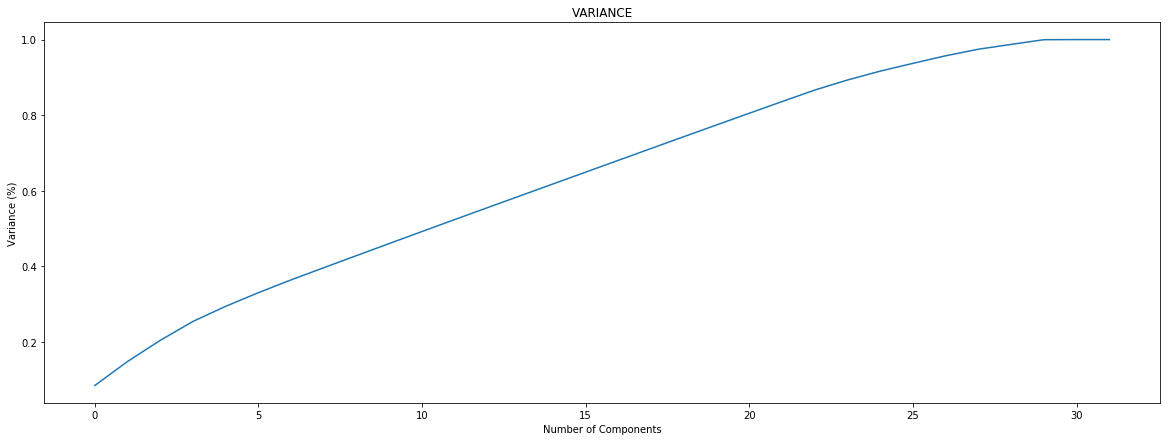

In [48]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

features = df.drop(labels=['Loan Status'],axis=1)
targets = pd.DataFrame(df['Loan Status'])

#try PCA to improve model
features = sc.fit_transform(features)
pca_data = PCA().fit(features)
#Plot the Cumulative Summation of the Explained Variance
plt.figure(figsize=(20,7))
plt.plot(np.cumsum(pca_data.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('VARIANCE')
plt.show()

In [0]:
features = PCA(n_components=29).fit_transform(features)

In [50]:
# Split into 80% training and 20% testing set
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size = 0.2, random_state = 42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(79835, 29)
(19959, 29)
(79835, 1)
(19959, 1)


In [51]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Encoding the Dependent Variable
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_y_train = LabelEncoder()
y_train = labelencoder_y_train.fit_transform(y_train)
labelencoder_y_test = LabelEncoder()
y_test = labelencoder_y_test.fit_transform(y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
def cross_val(X_train, y_train, model):
    # Applying k-Fold Cross Validation
    from sklearn.model_selection import cross_val_score
    accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)
    return accuracies.mean()

# Takes in a model, trains the model, and evaluates the model on the test set
def fit_and_evaluate(model):
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions and evalute
    model_pred = model.predict(X_test)
    model_cross = cross_val(X_train, y_train, model)
    
    # Return the performance metric
    return model_cross

#Random Forest

In [0]:
# #Random Forest
random = RandomForestClassifier(n_estimators = 75, criterion = 'entropy')
random_cross = fit_and_evaluate(random)

print('Random Forest Performance on the test set: Cross Validation Score = %0.4f' % random_cross)

#Logistic Regression

In [8]:
'''
# # Logistic Regression
logr = LogisticRegression()
logr_cross = fit_and_evaluate(logr)

print('Logistic Regression Performance on the test set: Cross Validation Score = %0.4f' % logr_cross)
'''

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

Logistic Regression Performance on the test set: Cross Validation Score = 0.7741


#XGBClassifier

In [7]:
'''
xgb = XGBClassifier(max_depth=3,learning_rate=0.1,n_estimators=100)
xgb_cross = fit_and_evaluate(xgb)

print('XGB Performance on the test set: Cross Validation Score = %0.4f' % xgb_cross)
'''

XGB Performance on the test set: Cross Validation Score = 0.7742


# **Neural Net**

In [22]:
'''
from keras import Sequential
from keras.layers import Dense

classifier = Sequential()
#First Hidden Layer
classifier.add(Dense(16, activation='relu', kernel_initializer='random_normal', input_dim=32))
#Second  Hidden Layer
classifier.add(Dense(10, activation='relu', kernel_initializer='random_normal'))

#Output Layer
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))

#Compiling the neural network
classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])
classifier.fit(X_train,y_train, batch_size=50, epochs=100)
'''





Epoch 1/100
79835/79835 [==============================] - 3s 37us/step - loss: 0.5052 - acc: 0.7738
Epoch 2/100
79835/79835 [==============================] - 2s 29us/step - loss: 0.4939 - acc: 0.7740
Epoch 3/100
79835/79835 [==============================] - 2s 29us/step - loss: 0.4928 - acc: 0.7740
Epoch 4/100
79835/79835 [==============================] - 2s 29us/step - loss: 0.4922 - acc: 0.7740
Epoch 5/100
79835/79835 [==============================] - 2s 29us/step - loss: 0.4919 - acc: 0.7740
Epoch 6/100
79835/79835 [==============================] - 2s 29us/step - loss: 0.4916 - acc: 0.7740
Epoch 7/100
79835/79835 [==============================] - 2s 29us/step - loss: 0.4914 - acc: 0.7740
Epoch 8/100
79835/79835 [==============================] - 2s 29us/step - loss: 0.4913 - acc: 0.7740
Epoch 9/100
79835/79835 [==============================] - 2s 29us/step - loss: 0.4911 - acc: 0.7740
Epoch 10/100
79835/79835 [==============================] - 2s 29us/step - loss: 0.4909 - a